Import libraries

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

Variables

In [2]:
# s = design variable diesel engine speed in rpm

CO2 = np.array([[ 800, 708],
                [1000, 696.889],
                [1200, 688.247],
                [1400, 682.897],
                [1700, 684.955],
                [1800, 697.3  ]])
POW = np.array([[ 800, 161.141],
                [1000, 263.243],
                [1200, 330.51 ],
                [1400, 381.561],
                [1700, 391.17 ],
                [1800, 370    ]])

def CO2func(s):
    return sp.interpolate.pchip_interpolate(CO2[:,0],CO2[:,1],s)

def POWfunc(s):
    return sp.interpolate.pchip_interpolate(POW[:,0],POW[:,1],s)

s0 = np.array(1200)

bounds = [[800,1800]]

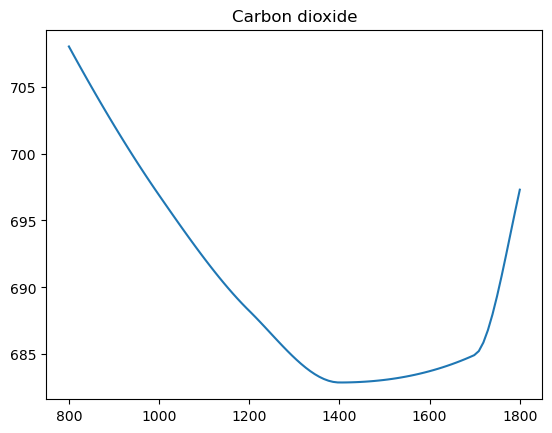

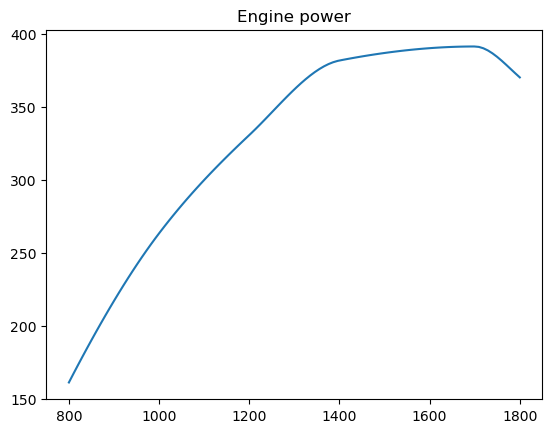

In [3]:
CO2_x = np.linspace(800,1800,100)
CO2_y = CO2func(CO2_x)
plt.plot(CO2_x,CO2_y)
plt.title('Carbon dioxide')

POW_x = np.linspace(800,1800,100)
POW_y = POWfunc(POW_x)
plt.figure()
plt.plot(POW_x,POW_y)
plt.title('Engine power');

### Weighted objective functions

Objective function

In [4]:
delta_p = 1/3
delta_c = 1 - delta_p
def weighted_obj(s):
    return -delta_p * POWfunc(s) + delta_c * CO2func(s)

Solve the problem

In [5]:
result = sp.optimize.minimize(fun = weighted_obj,x0 = s0,bounds = bounds)
print(result)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 325.81425292950235
        x: [ 1.613e+03]
      nit: 7
      jac: [-5.684e-06]
     nfev: 26
     njev: 13
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>


In [6]:
for delta_p in [0,1/3,2/3,1]:
    delta_c = 1 - delta_p
    result = sp.optimize.minimize(fun = weighted_obj,x0 = s0,bounds = bounds)
    print('For delta_p =',delta_p,', and delta_c =',delta_c,', s_optimal =',result.x)

For delta_p = 0 , and delta_c = 1 , s_optimal = [1399.98664189]
For delta_p = 0.3333333333333333 , and delta_c = 0.6666666666666667 , s_optimal = [1613.36072426]
For delta_p = 0.6666666666666666 , and delta_c = 0.33333333333333337 , s_optimal = [1671.58716913]
For delta_p = 1 , and delta_c = 0 , s_optimal = [1699.93697941]


Plot the result

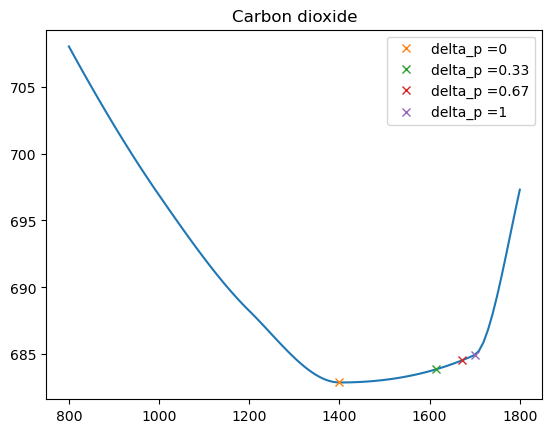

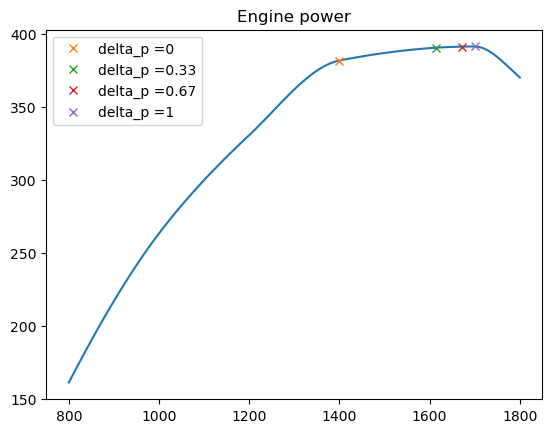

In [7]:
CO2_y = CO2func(CO2_x)
plt.plot(CO2_x,CO2_y)
plt.title('Carbon dioxide')
axCO2 = plt.gca()

plt.figure()
plt.plot(POW_x,POW_y)
plt.title('Engine power')
axPOW = plt.gca()


for delta_p in [0,1/3,2/3,1]:
    delta_c = 1 - delta_p
    result = sp.optimize.minimize(fun = weighted_obj,x0 = s0,bounds = bounds)
    axCO2.plot(result.x,CO2func(result.x),'x',label='delta_p ='+str(round(delta_p,2)))
    axPOW.plot(result.x,POWfunc(result.x),'x',label='delta_p ='+str(round(delta_p,2)))
    
axCO2.legend()
axPOW.legend();

### goal-attainment

In [8]:
Pt = 460
Ct = 640
def goal_attainment(s):
    return max(-(POWfunc(s) - Pt),(CO2func(s)-Ct))

In [9]:
result = sp.optimize.minimize(fun = goal_attainment,x0 = s0,bounds = bounds)
print(result)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 68.83000008096866
        x: [ 1.700e+03]
      nit: 12
      jac: [-5.684e-06]
     nfev: 50
     njev: 25
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>


Plot the result

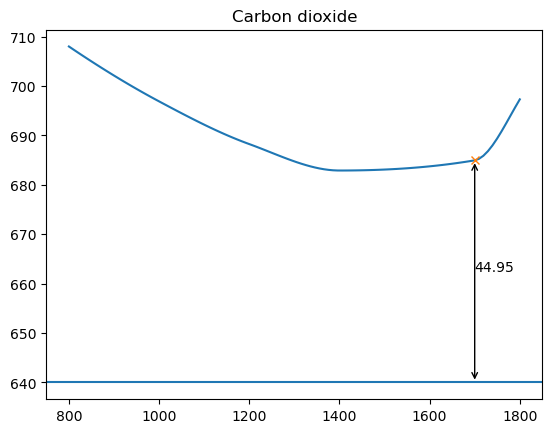

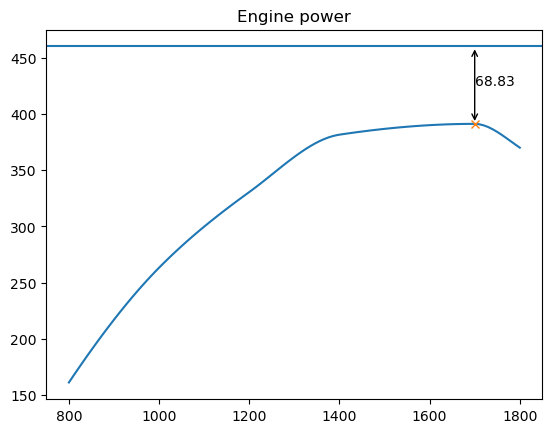

In [10]:
CO2_y = CO2func(CO2_x)
plt.plot(CO2_x,CO2_y)
plt.plot(result.x,CO2func(result.x),'x')
plt.annotate('',(result.x,CO2func(result.x)),(result.x,Ct),arrowprops=dict(arrowstyle= '<->'))
plt.annotate(str(round(CO2func(result.x)[0]-Ct,2)),(result.x,(CO2func(result.x)+Ct)/2))
plt.title('Carbon dioxide')

plt.axhline(Ct)
plt.figure()
plt.plot(POW_x,POW_y)
plt.plot(result.x,POWfunc(result.x),'x')
plt.annotate('',(result.x,POWfunc(result.x)),(result.x,Pt),arrowprops=dict(arrowstyle= '<->'))
plt.annotate(str(round(-(POWfunc(result.x)[0]-Pt),2)),(result.x,(POWfunc(result.x)+Pt)/2))
plt.title('Engine power')
plt.axhline(Pt);

### Construct Pareto front

In [11]:
s_opt = []
for delta_p in np.linspace(0,1,100):
    delta_c = 1 - delta_p
    result = sp.optimize.minimize(fun = weighted_obj,x0 = s0,bounds = bounds)
    s_opt.append(result.x)

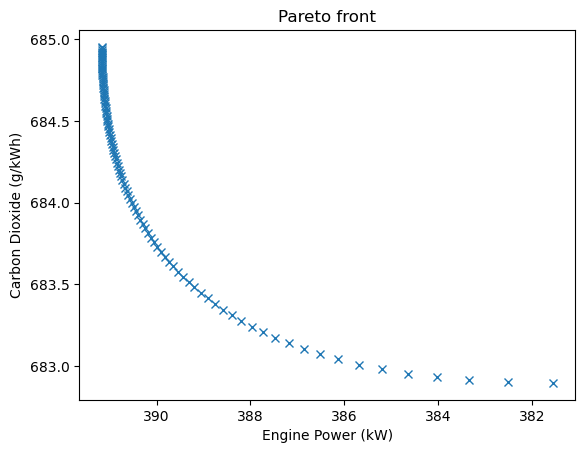

In [12]:
P_opt = POWfunc(s_opt)
C_opt = CO2func(s_opt)
plt.figure()
plt.plot(P_opt,C_opt,'x')
plt.title('Pareto front')
plt.xlabel('Engine Power (kW)')
plt.ylabel('Carbon Dioxide (g/kWh)')
ax = plt.gca()
ax.invert_xaxis()